Filter setting

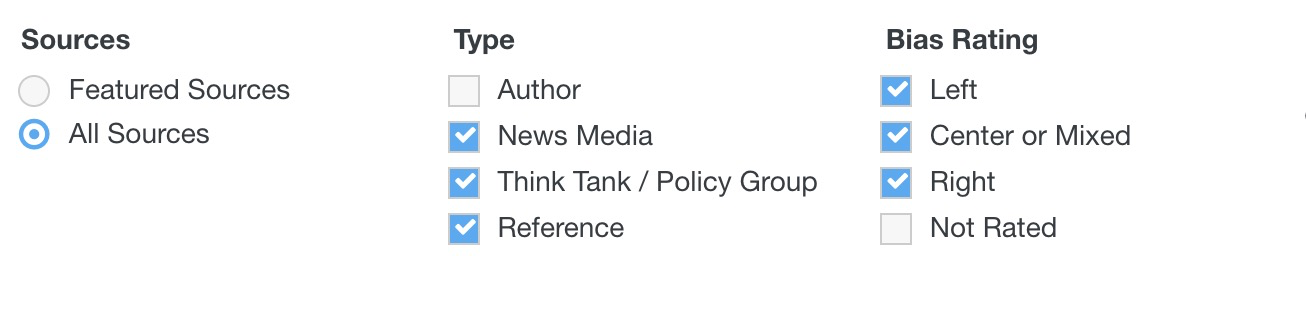

In [6]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import requests

In [7]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://www.allsides.com/media-bias/media-bias-ratings?field_featured_bias_rating_value=All&field_news_source_type_tid%5B2%5D=2&field_news_source_type_tid%5B3%5D=3&field_news_source_type_tid%5B4%5D=4&field_news_bias_nid_1%5B1%5D=1&field_news_bias_nid_1%5B2%5D=2&field_news_bias_nid_1%5B3%5D=3&title=")

import time
for i in range(100):
    time.sleep(1)
    browser.execute_script("window.scrollTo(0, 100000);")

In [8]:
html_source = browser.page_source
soup = BeautifulSoup(html_source, "html.parser")

# 動態爬蟲：全部都先爬下來了

In [9]:
soup.prettify()

<html class="js" dir="ltr" lang="en" prefix="og: http://ogp.me/ns# content: http://purl.org/rss/1.0/modules/content/ dc: http://purl.org/dc/terms/ foaf: http://xmlns.com/foaf/0.1/ rdfs: http://www.w3.org/2000/01/rdf-schema# sioc: http://rdfs.org/sioc/ns# sioct: http://rdfs.org/sioc/types# skos: http://www.w3.org/2004/02/skos/core# xsd: http://www.w3.org/2001/XMLSchema#"><!--<![endif]--><head profile="http://www.w3.org/1999/xhtml/vocab"><iframe id="pxcelframe" src="//t.sharethis.com/a/t_.htm?ver=1.367.21580&amp;cid=c010&amp;cls=B#cid=c010&amp;cls=B&amp;dmn=www.allsides.com&amp;rnd=1606913605837&amp;tt=t.dhj&amp;dhjLcy=44&amp;lbl=pxcel&amp;flbl=pxcel&amp;ll=d&amp;ver=1.367.21580&amp;ell=d&amp;cck=__stid&amp;pn=%2Fmedia-bias%2Fmedia-bias-ratings&amp;qs=field_featured_bias_rating_value%3DAll%26field_news_source_type_tid%255B2%255D%3D2%26field_news_source_type_tid%255B3%255D%3D3%26field_news_source_type_tid%255B4%255D%3D4%26field_news_bias_nid_1%255B1%255D%3D1%26field_news_bias_nid_1%255B2%

In [11]:
# 最後一筆資料媒體名稱為ZeroHedge 
# 上面soup 有爬到，但此cell 沒有顯示出來

media=[]
for even in soup.find_all(class_="even"):
    a =even.find_all('a')
    media.append(a[0].text)
media

['Bias: Leaning Left',
 'Bias: Leaning Right',
 'ABC News (Online)',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Abridge News',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'ACLU',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Al Jazeera',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'AllSides Community',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'American Conservative Union',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'American Greatness',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'American Thinker',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Bias: Leaning Left',
 'Bias: Leaning Right',
 'Americans for Tax Reform',
 'Bias: Le

In [12]:
'''

不知道為何多出現了
agree 
disagree

'''

for d in soup.find_all(class_="views-field views-field-nothing community-feedback"):
     print(d.text)



agree
disagree


1756/3453


Community disagrees:disagree



agree
disagree


28998/15352


Community agrees:agree



agree
disagree


178/72


Community strongly agrees:strongly agree



agree
disagree


318/190


Community agrees:agree



agree
disagree


918/584


Community agrees:agree



agree
disagree


1831/2716


Community somewhat disagrees:somewhat disagree



agree
disagree


427/140


Community absolutely agrees:absolutely agree



agree
disagree


4539/7033


Community disagrees:disagree



agree
disagree


3953/1568


Community strongly agrees:strongly agree



agree
disagree


2506/1438


Community agrees:agree



agree
disagree


10510/2243


Community absolutely agrees:absolutely agree



agree
disagree


914/445


Community strongly agrees:strongly agree



agree
disagree


1710/936


Community agrees:agree



agree
disagree


375/129


Community strongly agrees:strongly agree



agree
disagree


89/147


Community disagrees:disagree



agree
disagree


1788/959


C

# 我嘗試的結果：只能分開爬奇數和偶數的資料ＱＱ

In [15]:
#偶數資料中
for even in soup.find_all(class_="even"):
    a =even.find_all('a')
    print(a[:1])

'''
<a href="/media-bias/left-center">
<a href="/media-bias/allsides">
'''

[<a href="#40" title="Bias: Leaning Left">Bias: Leaning Left</a>]
[<a href="#80" title="Bias: Leaning Right">Bias: Leaning Right</a>]
[<a href="/news-source/abc-news-media-bias">ABC News (Online)</a>]
[<a href="#40" title="Bias: Leaning Left">Bias: Leaning Left</a>]
[<a href="#80" title="Bias: Leaning Right">Bias: Leaning Right</a>]
[<a href="#40" title="Bias: Leaning Left">Bias: Leaning Left</a>]
[<a href="#80" title="Bias: Leaning Right">Bias: Leaning Right</a>]
[<a href="/news-source/abridge-news-media-bias">Abridge News</a>]
[<a href="#40" title="Bias: Leaning Left">Bias: Leaning Left</a>]
[<a href="#80" title="Bias: Leaning Right">Bias: Leaning Right</a>]
[<a href="#40" title="Bias: Leaning Left">Bias: Leaning Left</a>]
[<a href="#80" title="Bias: Leaning Right">Bias: Leaning Right</a>]
[<a href="/news-source/american-civil-liberties-union">ACLU</a>]
[<a href="#40" title="Bias: Leaning Left">Bias: Leaning Left</a>]
[<a href="#80" title="Bias: Leaning Right">Bias: Leaning Right</a>

'\n<a href="/media-bias/left-center">\n<a href="/media-bias/allsides">\n'

In [14]:
# odd media 奇數資料
for odd in soup.find_all(class_="odd"):
    a =odd.find_all('a')
    print(a)

[<a href="/user/register"><strong>Go ad-free!</strong> Support AllSides.</a>, <a href="/ads">About these ads</a>]
[<a class="hybridauth-widget-provider hybridauth-onclick-current hybridauth-onclick-processed hybridauth-provider-processed" data-ajax="false" data-hybridauth-height="500" data-hybridauth-provider="Facebook" data-hybridauth-url="/hybridauth/window/Facebook?destination=%3Cfront%3E&amp;destination_error=bias/bias-ratings%3Ffield_featured_bias_rating_value%3DAll%26field_news_source_type_tid%255B2%255D%3D2%26field_news_source_type_tid%255B3%255D%3D3%26field_news_source_type_tid%255B4%255D%3D4%26field_news_bias_nid_1%255B1%255D%3D1%26field_news_bias_nid_1%255B2%255D%3D2%26field_news_bias_nid_1%255B3%255D%3D3%26title%3D" data-hybridauth-width="800" href="/hybridauth/window/Facebook?destination=%3Cfront%3E&amp;destination_error=bias/bias-ratings%3Ffield_featured_bias_rating_value%3DAll%26field_news_source_type_tid%255B2%255D%3D2%26field_news_source_type_tid%255B3%255D%3D3%26field_

# 練習用範例

In [41]:
import numpy as np
import requests as rq
from bs4 import BeautifulSoup

url = 'https://www.ptt.cc/bbs/NBA/index.html'
response = rq.get(url)
html_doc = response.text # text 屬性就是 html 檔案
soup = BeautifulSoup(response.text, "html.parser") # 指定 lxml 作為解析器

author_ids = [] # 建立一個空的 list 來放作者 id
recommends = [] # 建立一個空的 list 來放推文數
post_titles = [] # 建立一個空的 list 來放文章標題
post_dates = [] # 建立一個空的 list 來放發文日期

posts = soup.find_all("div", class_ = "r-ent")
for post in posts:
    try:
        author_ids.append(post.find("div", class_ = "author").string)    
    except:
        author_ids.append(np.nan)
    try:
        post_titles.append(post.find("a").string)
    except:
        post_titles.append(np.nan)
    try:
        post_dates.append(post.find("div", class_ = "date").string)
    except:
        post_dates.append(np.nan)

# 推文數藏在 div 裡面的 span 所以分開處理
recommendations = soup.find_all("div", class_ = "nrec")
for recommendation in recommendations:
    try:
        recommends.append(int(recommendation.find("span").string))
    except:
        recommends.append(np.nan)

print(type(author_ids))
print(recommends)
print(post_titles)
print(post_dates)

<class 'list'>
[5, 2, 16, 3, 77, 24]
['[新聞] 招募CP3不只為多贏幾場球 太陽GM豪語:目標是總冠軍', '[公告] 板規v6.8', '[公告] 季後賽條款於10/14零時解除', '[公告] 關於交易簽約相關情報文不限額度 ', '[情報] 2020-21 自由球員市場異動 (表格)(12/1)', '[情報] 2020-21 自由球員市場異動 (每日文字)  ']
['12/01', ' 5/24', '10/13', '11/17', '11/19', '11/19']
